# KdV Equation

This notebook uses a C++ program to solve the KdV equation
$$
\partial_t u + \partial_{xxx} u - 6 u \partial_{x} u = 0
$$
and then visualizes the results

## Test and Visualize Results

#### Load various modules and set defaults

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import os
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'

#### Run the kdv equation solver

In [2]:
!cd ../build && class23/kdv

#### Plot the initial condition

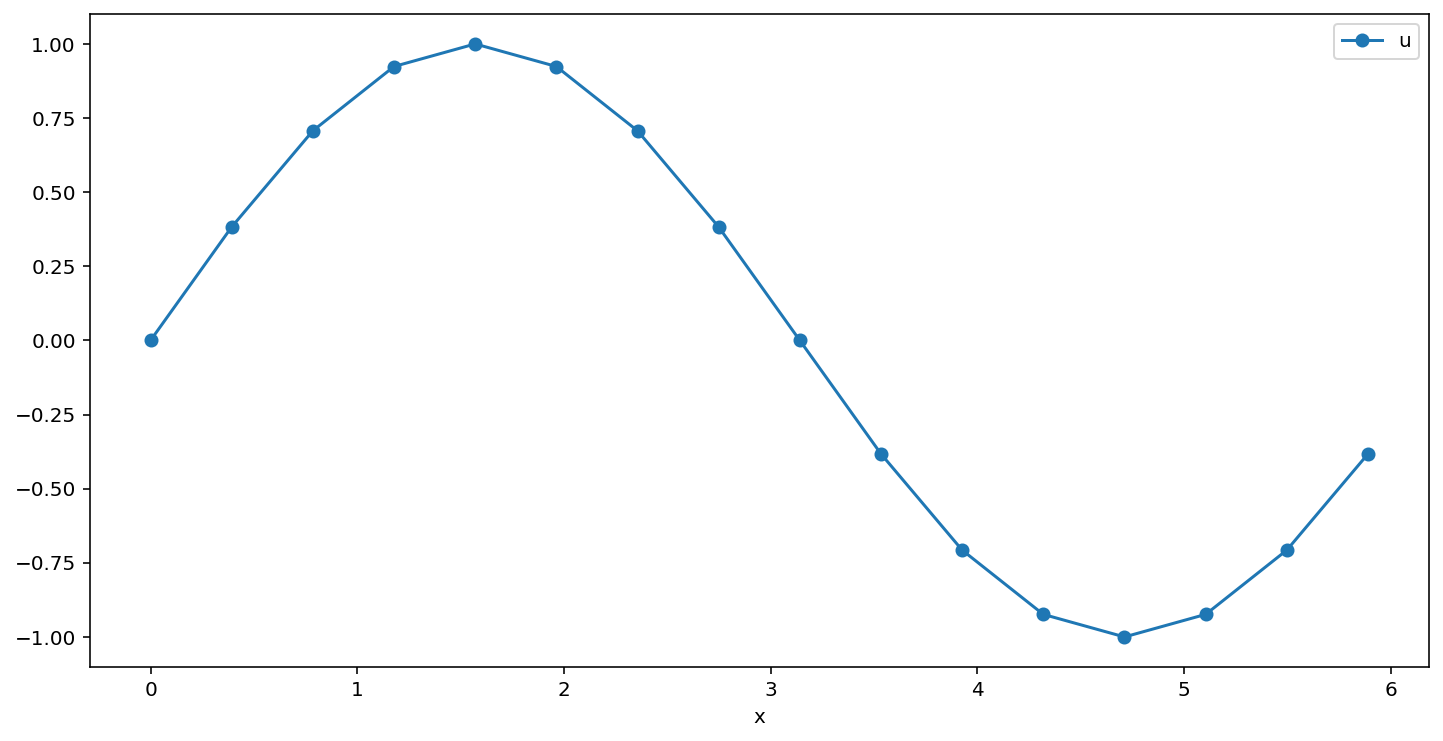

In [3]:
dir = "../build"
df = pd.read_csv(os.path.join(dir, "u-0-0.csv"), names=("x", "u"))
df.plot(x="x", y="u", style="o-");

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

line, = ax.plot([], [], lw=2)
plt.close()

In [5]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    df = pd.read_csv(os.path.join(dir, f"u-{i}-0.csv"), names=("x", "u"))
    line.set_data(df["x"], df["u"])
    return (line,)

#### Show an animation of the time evolution of the solution

In [6]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=200, blit=True)